<a href="https://colab.research.google.com/github/TChen90/TensorFlow/blob/master/Improving_the_simple_net_in_TF2_0_with_hidden_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [0]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# X_train is 60,000 rows of 28*28 values
X_train.shape

(60000, 28, 28)

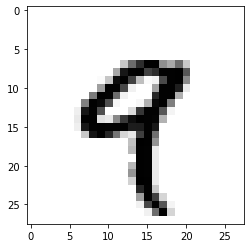

In [4]:
# A sample digit
digit = X_train[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [5]:
print(y_train[4])

9


In [0]:
# Reshape
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

In [7]:
# Normalize inputs to be within [0, 1]
X_train, X_test = X_train/255.0, X_test/255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [0]:
# Labes have one-hot representation
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [0]:
# Build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(784,), name='dense_layer'))
model.add(keras.layers.Dense(128, activation='relu', name='dense_layer2'))
model.add(keras.layers.Dense(10, activation='softmax', name='dense_layer3'))

In [10]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dense_layer2 (Dense)         (None, 128)               16512     
_________________________________________________________________
dense_layer3 (Dense)         (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 1s 4ms/step - loss: 1.4715 - accuracy: 0.6205 - val_loss: 0.7579 - val_accuracy: 0.8331
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.6034 - accuracy: 0.8483 - val_loss: 0.4573 - val_accuracy: 0.8823
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4402 - accuracy: 0.8811 - val_loss: 0.3743 - val_accuracy: 0.8979
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3784 - accuracy: 0.8945 - val_loss: 0.3345 - val_accuracy: 0.9076
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.9019 - val_loss: 0.3099 - val_accuracy: 0.9114
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3205 - accuracy: 0.9087 - val_loss: 0.2928 - val_accuracy: 0.9170
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3027 - accuracy: 0.9138 - val_loss: 0.2804 - val_accuracy: 0.9174
Epoch 

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.9642
Test accuracy:  0.9642000198364258
